In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from dynamic_reparameterization.DynamicReparameterizationNet import DynamicReparameterizationNet

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = DynamicReparameterizationNet([3, 64, 64, 64, 2], H=0.001, sparsity=0.95, Np=100, fractional_tolerence=0.1, verbose=False)

In [5]:
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.01, weight_decay=0.001, epochs_reallocate=25)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.001, weight_decay=0.001, epochs_reallocate=100)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.0001, weight_decay=0.001, epochs_reallocate=250)
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.0001, weight_decay=0.001, epochs_reallocate=0)

Epoch 0: 0.7544609308242798
Sparsity: 0.953125 

Epoch 100: 1.001886010169983
Sparsity: 0.953125 

Epoch 200: 1.0930310487747192
Sparsity: 0.953125 

Epoch 300: 0.9038782715797424
Sparsity: 0.9562500007450581 

Epoch 400: 1.15846848487854
Sparsity: 0.9562500007450581 

Epoch 0: 0.9021874070167542
Sparsity: 0.9562500007450581 

Epoch 100: 0.9190422892570496
Sparsity: 0.9562500007450581 

Epoch 200: 0.9357534646987915
Sparsity: 0.9562500007450581 

Epoch 300: 1.1112010478973389
Sparsity: 0.9562500007450581 

Epoch 400: 0.7088081240653992
Sparsity: 0.9562500007450581 

Epoch 0: 0.8225535154342651
Sparsity: 0.9562500007450581 

Epoch 100: 0.8296191096305847
Sparsity: 0.9562500007450581 

Epoch 200: 0.9824477434158325
Sparsity: 0.9562500007450581 

Epoch 300: 0.803318440914154
Sparsity: 0.9562500007450581 

Epoch 400: 0.8497101068496704
Sparsity: 0.9562500007450581 

Epoch 0: 0.9366930723190308
Sparsity: 0.9562500007450581 

Epoch 100: 0.9230121970176697
Sparsity: 0.9562500007450581 

Epoch

In [9]:
y_pred = model(test_data.x).detach().numpy()

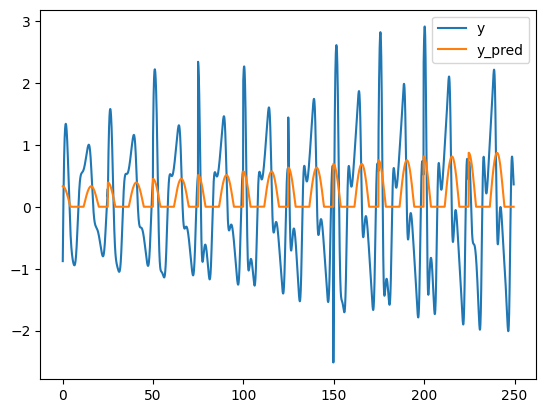

In [10]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [8]:
model.get_layerwise_sparsity()

[tensor(0.9635), tensor(0.9453)]